In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
cd '/content/gdrive/My Drive/work1'

/content/gdrive/My Drive/work1


### 사전 학습된 모델 불러오기

In [3]:
from tensorflow.keras.applications.vgg16 import VGG16

model = VGG16()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
553467904/553467096 [==============================] - 7s 0us/step


In [4]:
# 사전 학습된 모델 확인
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [0]:
# 분류에 사용할 이미지 불러오기

from tensorflow.keras.preprocessing.image import load_img 
import os

img_path = os.getcwd() + '/pretrained_learning/img/'

dog_img = load_img(img_path+'dog.jpg',target_size=(224,224))
cat_img = load_img(img_path+'cat.jpg',target_size=(224,224))

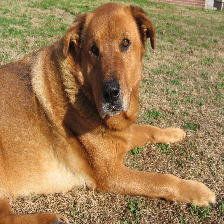

In [6]:
dog_img

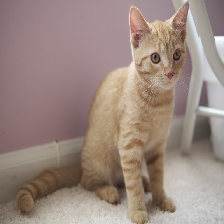

In [7]:
cat_img

### VGG16 모델에 맞는 형태로 데이터를 전처리해준다

In [0]:
from tensorflow.keras.preprocessing.image import img_to_array

arr_dog = img_to_array(dog_img)
arr_cat = img_to_array(cat_img)

In [9]:
print('shape of arr_dog = {}'.format(arr_dog.shape))
print('shape of arr_cat = {}'.format(arr_cat.shape))

shape of arr_dog = (224, 224, 3)
shape of arr_cat = (224, 224, 3)


In [0]:
# batch_size = 2 구현하기 위해서 두 장의 이미지를 하나로 합친다

import numpy as np

arr_input = np.stack([arr_dog, arr_cat])

In [11]:
# 하나로 합친 이미지의 크기를 확인한다

print('shape of arr_input = {}'.format(arr_input.shape))

shape of arr_input = (2, 224, 224, 3)


### 입력 이미지에 대한 '예측' 실행하기

In [0]:
pred = model.predict(arr_input)

In [14]:
# 입력 이미지에 대한 예측 결과 가져오기

from tensorflow.keras.applications.vgg16 import decode_predictions

results = decode_predictions(pred)

40960/35363 [==================================] - 0s 0us/step


In [15]:
# 개의 이미지에 대한 예측 결과 확인

pred_dog = results[0]
print(pred_dog)

[('n02092339', 'Weimaraner', 0.66889364), ('n02099849', 'Chesapeake_Bay_retriever', 0.22789256), ('n02099712', 'Labrador_retriever', 0.06691594), ('n02100236', 'German_short-haired_pointer', 0.008100023), ('n02109047', 'Great_Dane', 0.0076225433)]


In [16]:
# 고양이의 이미지에 대한 예측 결과 확인

pred_cat = results[1]
print(pred_cat)

[('n02124075', 'Egyptian_cat', 0.53324056), ('n02123045', 'tabby', 0.17061445), ('n04040759', 'radiator', 0.058206853), ('n02123159', 'tiger_cat', 0.04625164), ('n15075141', 'toilet_tissue', 0.03773027)]
